# D213 - Advanced Data Analytics - Task 1
By Krista Moik

## Table of Contents

### Part I. Research Question
    - A1. Research Question
    - A2. Objectives or Goals

### Part II. Method Justification
    -B. Summary of Assumptions

### Part III. Data Preparation
    - C1. Line Graph Visualization
    - C2. Time Step Formatting
    - C3. Stationarity
    - C4. Steps to Prepare the Data
    - C5. Prepared Data Set

### Part IV. Model Identification and Analysis
    - D1. Report Findings and Visualizations
    - D2. ARIMA Model
    - D3. Forecasting Using ARIMA Model
    - D4. Output and Calculations
    - D5. Code

### Part V. Data Summary and Implications
    - E1. Results
    - E2. Annotated Visualization
    - E3. Recommendation

### Part VI. Reporting
    - F. Reporting
    - G. Sources for Third-Party Code
    - H. Sources
    - I. Professional Communicationofessional Communication
fessional Communication
n


# Part I: Research Question 


## A1.  Research Question

Using the provided historical dataset medical_time_series, my research question is: **Can my ARIMA model forecast the revenue for the next 180 days?**  It is important for organizations to develop a model, especially an accurate one, to predict future revenue to help them make business decisions such as whether additional employees could be hired or if layoffs are needed. 

## A2.  Objectives or Goals

My goal is to create an ARIMA time series model to forecast the next1830 days of revenue.  As part of my goal, I will also test the model to determine its accuracy and thus effectiveness.



# Part II: Method Justification

## B.  Summary of Assumptions

One assumption of ARIMA is that the data is stationary and that the mean, variance, and autocorrelation do not change over time.  Additionally, ARIMA also assumes that the observations in the data are independent of each other.  Finally, ARIMA assumes that the relationship between variables is linear and that the residuals are normally distributed (Hyndman and Athanasopoulos, 2018).


# Part III: Data Preparation

## C1.  Line Graph Visualization

Please see the below data cleaning and preparation steps used to ultimately create a line graph visualization of the data.

 ### First I will import the packages/libraries I will be using in this analysis

In [1]:
# import libraries
import os
import numpy as np
from numpy import cumsum
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import signal
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import joblib

Check Python Version

In [2]:
from platform import python_version
('Python version used for this analysis is: ', python_version())

('Python version used for this analysis is: ', '3.11.5')

### Import data set

In [3]:
#import data set
df=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D213/medical_time_series .csv', index_col='Day', parse_dates=True)

### View the data

In [4]:
df.shape

(731, 1)

In [5]:
df.head()

,Revenue
Day,
1,0.000000
2,-0.292356
3,-0.327772
4,-0.339987
5,-0.124888


In [6]:
df.tail()

,Revenue
Day,
727,15.722056
728,15.865822
729,15.708988
730,15.822867
731,16.069429


In [7]:
df.info

<bound method DataFrame.info of        Revenue
Day           
1     0.000000
2    -0.292356
3    -0.327772
4    -0.339987
5    -0.124888
..         ...
727  15.722056
728  15.865822
729  15.708988
730  15.822867
731  16.069429

[731 rows x 1 columns]>

### Cleaning and Preprocessing

In [8]:
#check for duplicates
df.duplicated().sum()

0

In [9]:
# Check for nulls
df.isnull().sum()

Revenue    0
dtype: int64

In [10]:
#view statistics
df.describe()

,Revenue
count,731.000000
mean,14.179608
std,6.959905
min,-4.423299
25%,11.121742
50%,15.951830
75%,19.293506
max,24.792249


### Line Graph Visualization

After the days were appropriately changed to dates from 1/1/2019 to 12/31/2020, I visualized the below line graph of the data.  The first still uses the number of days, and then after the days were changed to dates, I plotted another line graph.

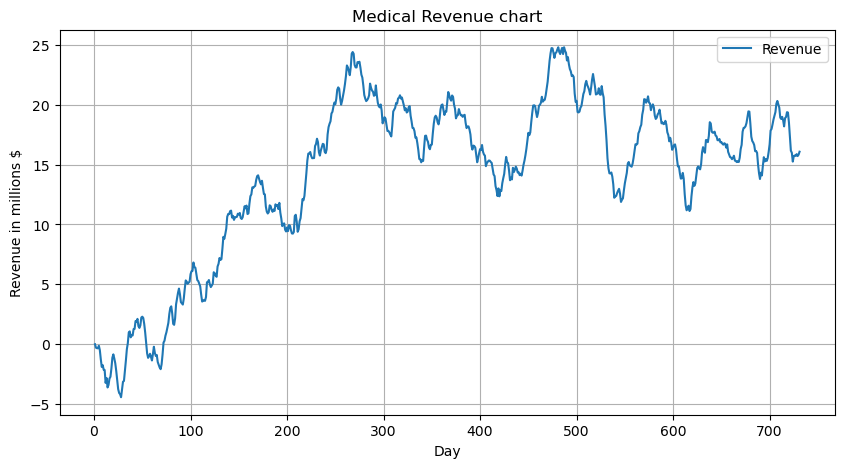

In [11]:
# visualizing the data
df.plot(grid=True, figsize=(10,5))
plt.title('Medical Revenue chart')
plt.xlabel('Day')
plt.ylabel('Revenue in millions $')
plt.grid(True)
plt.show()

## C2.  Time Step Formatting

The line graph confirms there are no gaps in measurement.  The data was initially made up of 1 column called Day which had observations from day 1 until day 731, and a second column titled Revenue.  There were also no missing values in the Revenue column.  The Day column was then converted into a DateTime Object and renamed as Date with the first date being 1/1/2019, and the last date being 12/31/2020 (Western Governors University, n.d.).


In [12]:
#convert Day to DateTime
df['date']=pd.date_range(start=datetime(2019, 1, 1), periods=df.shape[0], freq='24H')

In [13]:
#set date as index
df.set_index('date', inplace=True)
df

,Revenue
date,
2019-01-01,0.000000
2019-01-02,-0.292356
2019-01-03,-0.327772
2019-01-04,-0.339987
2019-01-05,-0.124888
...,...
2020-12-27,15.722056
2020-12-28,15.865822
2020-12-29,15.708988


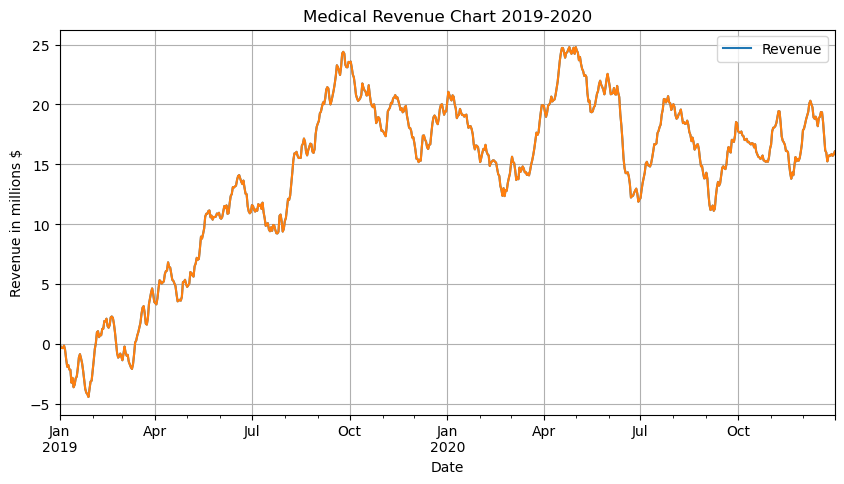

In [14]:
#visualize dataset with dates
df.plot(grid=True, figsize=(10,5))
plt.plot(df.Revenue)
plt.title('Medical Revenue Chart 2019-2020')
plt.xlabel('Date')
plt.ylabel('Revenue in millions $')
plt.grid(True)
plt.show()

## C3.  Stationarity

The dataset was determined to be non-stationary by showing an upward tren (see line graph above)d and this was confirmed by the Augmented Dickey-Fuller test which showed a p-value greater than our 0.05 alpha valu, as shown in the code belowe (Western Governors University, n.d.)  More information regarding making the data stationary is discussed in C4..


Test Statistics:  -2.218319047608944
P-value: 0.1996640061506439
Critical Values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Fail to reject the null hypothesis. The time series is non-stationary.


<Axes: xlabel='date'>

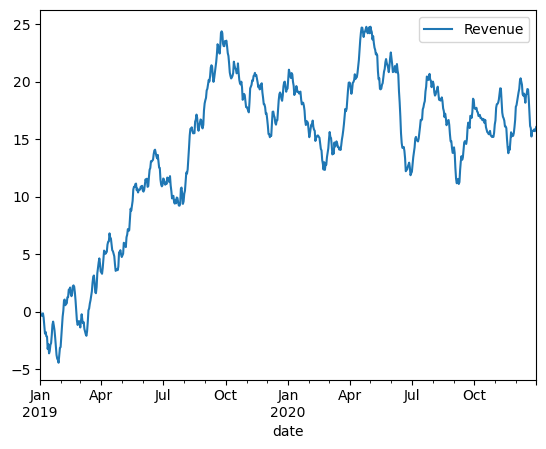

In [15]:
#performing Augmented Dickey-Fuller test/check for stationarity
result = adfuller(df['Revenue'])
print('Test Statistics: ', result[0])
print('P-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('Reject the null hypothesis. The time series is stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is non-stationary.')
df.plot()

In [16]:
#make time series stationary via differencing and drop null column
df_stationary=df.diff().dropna()
df_stationary.head()

,Revenue
date,
2019-01-02,-0.292356
2019-01-03,-0.035416
2019-01-04,-0.012215
2019-01-05,0.215100
2019-01-06,-0.366702


Test Statistics: -17.37477230355706
P-value: 5.1132069788403175e-30
Critical Values: {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Reject the null hypothesis. The time series is stationary.


<Axes: xlabel='date'>

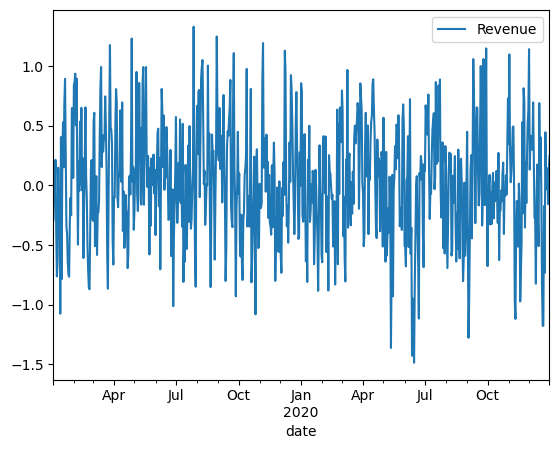

In [17]:
#run ADF again to see if data is now stationary:
result=adfuller(df_stationary['Revenue'])
print('Test Statistics:', result[0])
print('P-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('Reject the null hypothesis. The time series is stationary.')
else:
    print('Fail to reject the null hypothesis. The time series is non-stationary.')

df_stationary.plot()

In [18]:
#check for duplicates in stationary data
df_stationary.duplicated().sum()

0

In [19]:
#check for nulls in stationary data
df_stationary.isnull().sum()

Revenue    0
dtype: int64

## C4.  Steps to Prepare the Data

After viewing the data, I confirmed there were no nulls or duplicate values.  The Day column was then converted into a DateTime Object to show dates from 1/1/2019 to 12/31/2020, and the column was renamed to date and set as the index.  The data was visualized and the Augmented Dickey-Fuller test was run to find the p-value and determine the stationarity of the data set.  Once it was confirmed that the data was not stationary, differencing was used once and the Augmented Dickey-Fuller test was run again.  This time, it confirmed that our p-value was less than the 0.05 alpha value and thus the data was now stationary.  The differenced data set was called df_stationary.  This stationary data set was also checked for duplicates and nulls.  This cleaned and stationary data set was then saved as the attached CSV titled timeseriesclean.  The data will be split into training and testing data sets, see C5, where the testing data set is the last 180 days of the data since we are trying to predict the next 180 days (Resende 2024).  The split data sets can be viewed in the attached CSV files titled train and test.

## C5.  Prepared Data Set

A copy of the cleaned data set can be seen in the attached CSV titled timeseriesclean.  A copy of the cleaned split data set can be seen in the attached CSV files titled train and test.


In [20]:
#export cleaned dataset
df_stationary.to_csv('C:/Users/Kmoik WGU/Desktop/D213/timeseriesclean.csv')

In [21]:
#test/train stationary dataset for ARIMA
train = df_stationary.loc[df_stationary.index < df_stationary.index[-180]]
test = df_stationary.loc[df_stationary.index >= df_stationary.index[-180]]
print('train Shape', train.shape)
print('test Shape', test.shape)

train Shape (550, 1)
test Shape (180, 1)


In [22]:
train

,Revenue
date,
2019-01-02,-0.292356
2019-01-03,-0.035416
2019-01-04,-0.012215
2019-01-05,0.215100
2019-01-06,-0.366702
...,...
2020-06-30,0.179833
2020-07-01,0.121874
2020-07-02,0.672897


In [23]:
test

,Revenue
date,
2020-07-05,0.425743
2020-07-06,0.763464
2020-07-07,0.146082
2020-07-08,-0.281648
2020-07-09,-0.044672
...,...
2020-12-27,-0.032693
2020-12-28,0.143766
2020-12-29,-0.156834


In [24]:
#save split nonstationary data to csv
train.to_csv('C:/Users/Kmoik WGU/Desktop/D213/train.csv')
test.to_csv('C:/Users/Kmoik WGU/Desktop/D213/test.csv')

# Part IV: Model Identification and Analysis

## D1.  Report Findings and Visualizations
Although I will be using auto ARIMA, 
 still visualized the spectral density, seasonality, and ACF and PACF.  Below, I haveI plotted the spectral density of both the nonstationary and stationary data sets to compare (Western Governors University, n.d.):


#### Spectral Density and Periodogram

(array([1.52612936e+04, 8.12118786e+03, 2.62760550e+02, 1.24454986e+02,
        5.40026379e+01, 2.55196420e+01, 2.89237553e+01, 6.29449800e+00,
        8.38967529e+00, 8.79735213e+00, 3.26244345e+00, 5.16464998e+00,
        4.64370619e+00, 1.96867736e+00, 1.48167320e+00, 2.11256649e+00,
        1.08550271e+00, 5.81988645e-01, 2.76744723e+00, 2.22308983e+00,
        5.50876230e-01, 7.49752606e-01, 1.26157210e+00, 8.77859381e-01,
        4.84404330e-01, 4.39565525e-01, 2.05055025e-01, 9.50457901e-01,
        5.23499207e-01, 4.35456489e-01, 1.69884060e+00, 8.97977002e-01,
        7.28275718e-01, 6.11527179e-01, 1.49053313e+00, 5.44383887e-01,
        2.17350902e-01, 5.07814496e-01, 4.43820257e-01, 2.94184611e-01,
        2.55373626e-01, 9.44702588e-02, 1.58619217e-01, 1.88829134e-01,
        2.11804293e-01, 6.04121179e-01, 4.95073852e-01, 2.15698285e-01,
        1.04432711e-01, 1.46393379e-01, 2.07457981e-01, 1.26602668e-01,
        1.74592665e-01, 1.42674366e-01, 9.63196690e-02, 1.177682

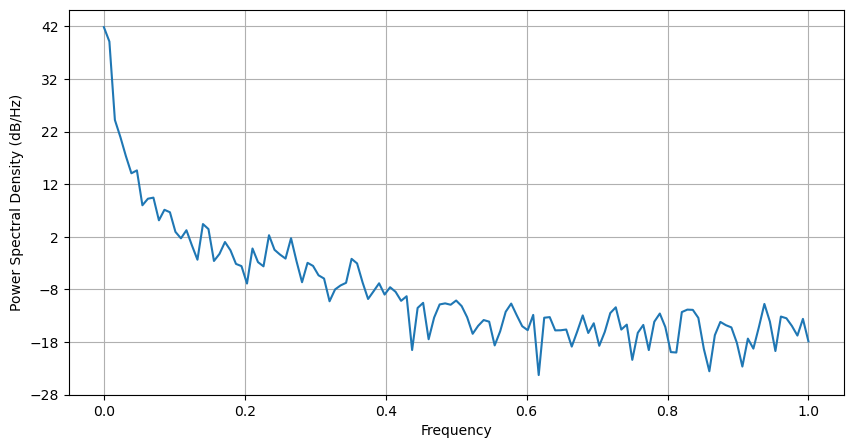

In [25]:
#spectral analysis on non-stationary dataset
plt.figure(figsize=(10,5), linewidth=3)
plt.psd(df['Revenue'])

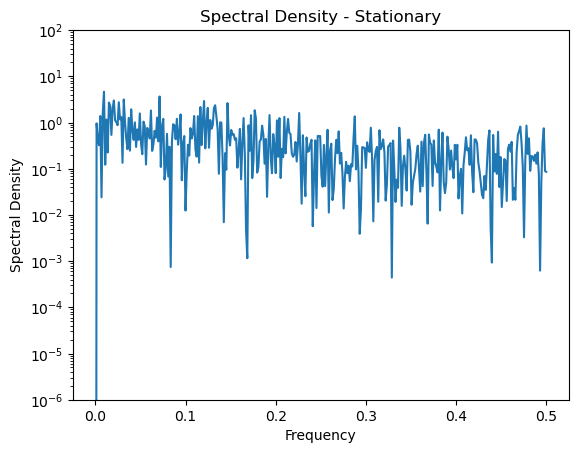

In [26]:
#spectral density of stationary data
f, Pxx_den=signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density - Stationary')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

The spectral density shows the variance of the data over different frequencies (Penn State University, n.d.).  The spectral density of the non-stationary data is clearly more varied than the spectral density of the stationary data, which is ideal as the stationary data should be relatively constant across the frequencies.

#### Seasonality

Next, I checked for seasonality in a 6 month portion of the stationary data set (Western Governors University, n.d.):

<Axes: xlabel='date'>

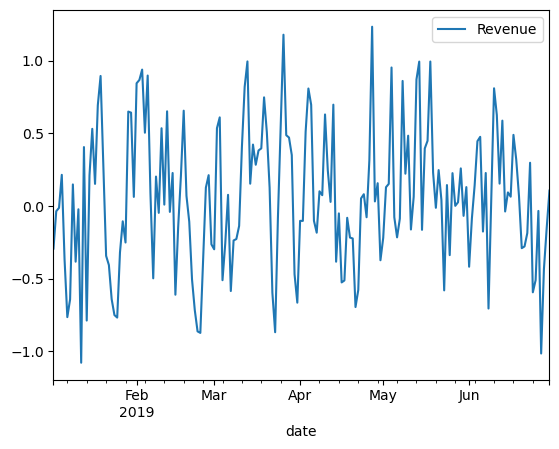

In [27]:
#check for seasonality on stationary data set
df_stationary.loc[:'2019-06-30'].plot()

There is possible seasonality showing so decomposition was used to further break down the data to show the seasonality, trend, and residuals (Western Governors University, n.d.):

#### Decomposition

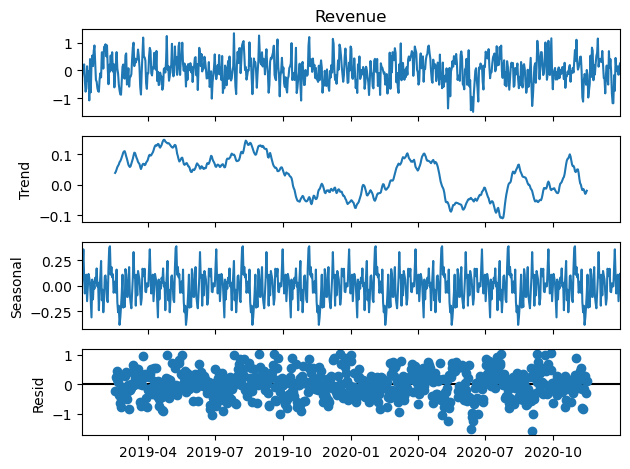

In [28]:
#perform decomposition of stationary data
decomp=seasonal_decompose(df_stationary['Revenue'], period=90)
#plot decomposition
decomp.plot()
plt.show()

<Axes: title={'center': 'Seasonality'}, xlabel='date'>

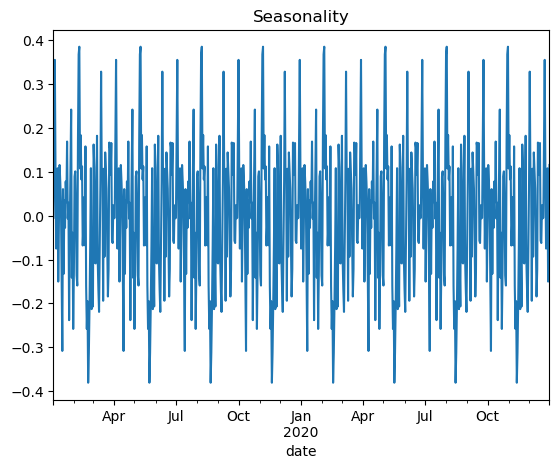

In [29]:
plt.title('Seasonality')
decomp.seasonal.plot()

The decomposed view of the seasonality plot seems to show similar trends every month. 

<Axes: title={'center': 'Trend'}, xlabel='date'>

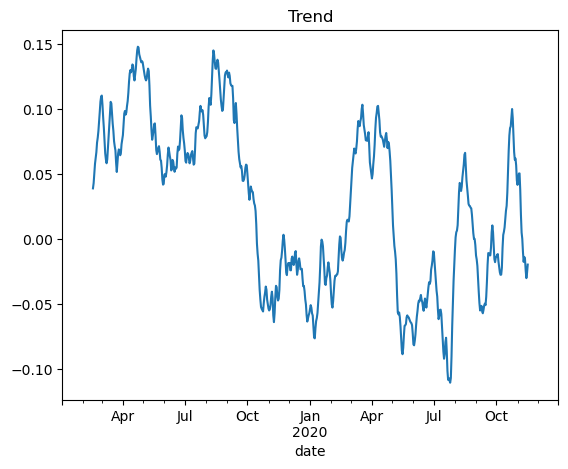

In [30]:
#plotting seasonality trend
plt.title('Trend')
decomp.trend.plot()

The decomposed view of the trend plot seems to show possible trends that follow the time of year where generally the spring and summer months trend higher than the winter months.  There does seem to be a change that resulted in a significant decrease around May of 2020.  I would theorize that this was Covid related, but as the direction for setting the DateTime Object was just to set dates that are at least 2 years in the past, this decrease appears to be a coincidence for the years I chose the days to represent.

<Axes: title={'center': 'Residuals'}, xlabel='date'>

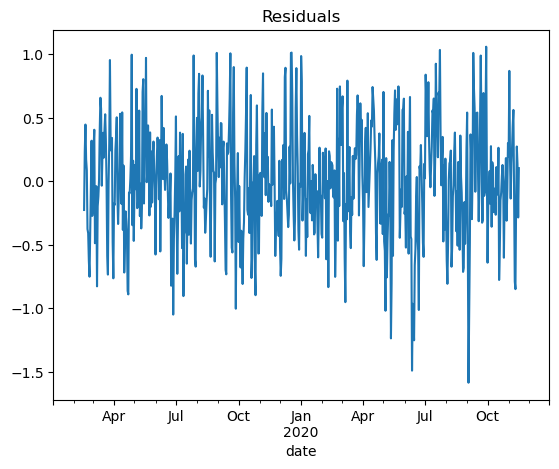

In [31]:
#plotting seasonal residuals
plt.title('Residuals')
decomp.resid.plot()

The decomposed view of the residuals appears to show more of a white noise effect rather than any discernible trend, indicating there may not be any seasonality.

#### ACF and PACF

Next, I plotted an autocorrelation graph along with ACF and PACF (Western Governors University, n.d.):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

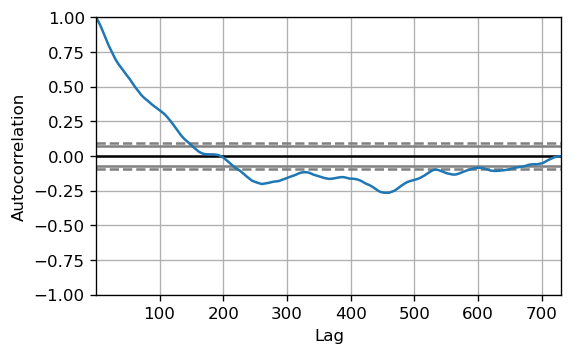

In [32]:
#continue looking for seasonality - autocorrelation plot of nonstationary data
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize': (5,3), 'figure.dpi': 120})
autocorrelation_plot(df.Revenue.tolist())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

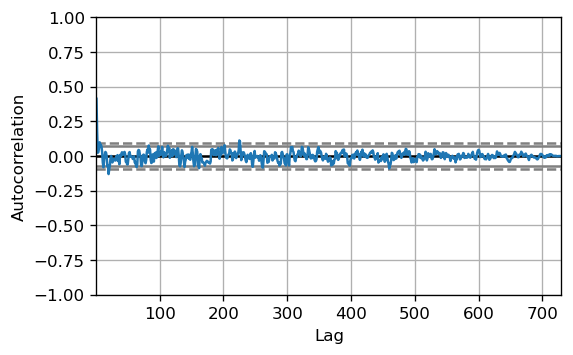

In [33]:
#continue looking for seasonality - autocorrelation plot of stationary data
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize': (5,3), 'figure.dpi': 120})
autocorrelation_plot(df_stationary.Revenue.tolist())

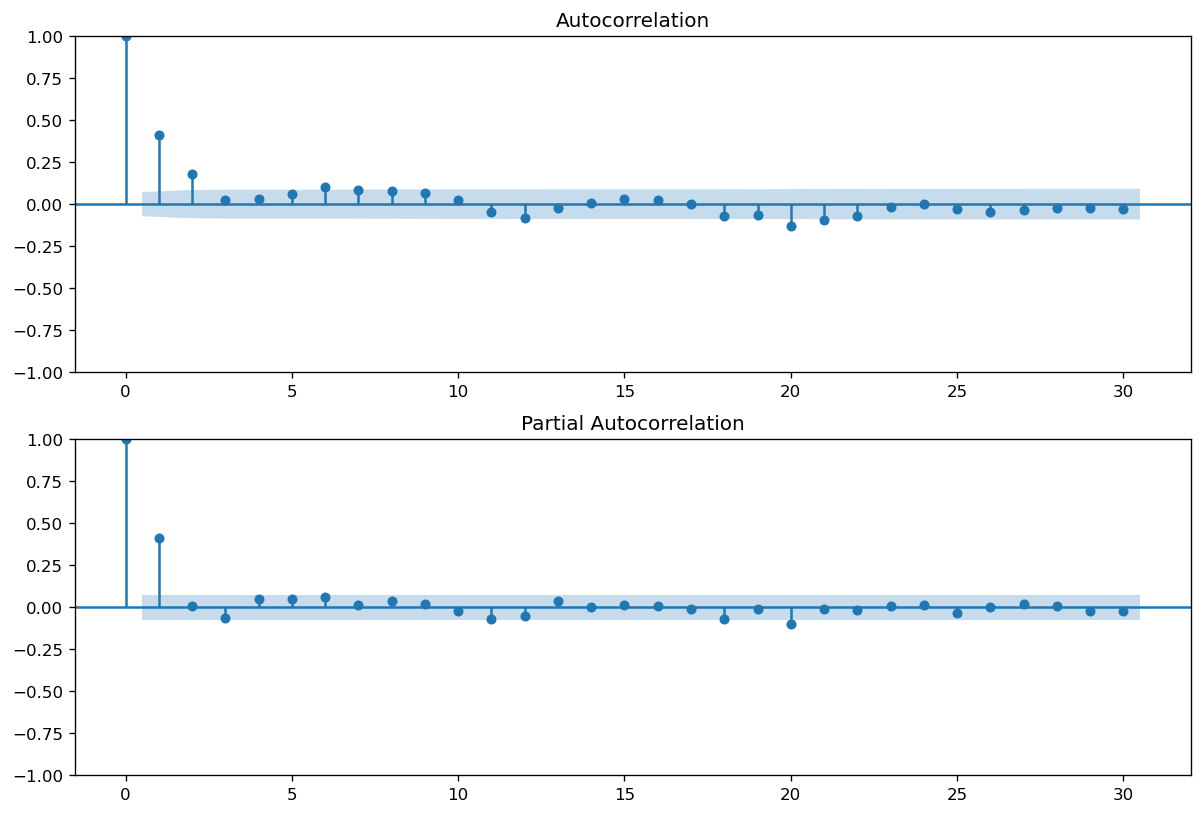

In [34]:
#graphing ACF on stationary data
fig=plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df_stationary.Revenue, lags=30, ax=ax1)
#graphing PACF on stationary data
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df_stationary.Revenue, lags=30, ax=ax2)
plt.show()

The autocorrelation plot shows low correlation that decreases as the lags increase.  The ACF and PACF plots both have the most significant lag at 0.  The ACF plot shows decreases down to 2 before it tails off.  The PACF plot decreases to 1 before tailing off.  This seems to indicate that our best values for p and q in our ARIMA model could be 0.

## D2.  ARIMA Model
I first ran auto ARIMA to see what the best suggested p, d, and q values were (Western Governors University, n.d.):


In [35]:
#auto Arima on stationary data set
stepwise_fit=auto_arima(df_stationary['Revenue'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=883.277, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1015.481, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=879.982, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=881.911, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=881.927, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=905.166, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=881.947, Time=0.23 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.138 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -437.991
Date:                Tue, 19 Mar 2024   AIC                            879.982
Time:                        09:42:12   BIC                            889.168
Sample:                    01-02-2019   HQIC                           883.526
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This suggests my best model has p, d, and q values of 1, 0, and 0.  The results summary also indicates that there is no seasonality in the data set and no differencing required.


I tested and fitted these results on my training ARIMA model (Western Governors University, n.d.):

In [36]:
#training Arima model
model=ARIMA(train['Revenue'], order=(1,0,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  550
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -334.126
Date:                Tue, 19 Mar 2024   AIC                            674.252
Time:                        09:42:12   BIC                            687.182
Sample:                    01-02-2019   HQIC                           679.305
                         - 07-04-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.032      0.790      0.430      -0.038       0.088
ar.L1          0.4091      0.039     10.492      0.000       0.333       0.485
sigma2         0.1973      0.013     15.465      0.000       0.172       0.222
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.78   Prob(JB):                         0.43
Heteroskedasticity (H):               1.06   Skew:                            -0.04
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model has an AIC of 845.07.  I created another model using different values for the p,d, and q obtained from my observations and visualizations of the data above to test that this was in fact the best model:

In [37]:
#checking another ARIMA model
model2=ARIMA(train['Revenue'], order=(0,1,0))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  550
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -429.712
Date:                Tue, 19 Mar 2024   AIC                            861.424
Time:                        09:42:12   BIC                            865.732
Sample:                    01-02-2019   HQIC                           863.108
                         - 07-04-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2801      0.018     15.881      0.000       0.246       0.315
===================================================================================
Ljung-Box (L1) (Q):                  55.37   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               1.06   Skew:                            -0.12
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Setting the p and q values to 0 created a model with a larger AIC of 1081.35.  As we are looking for the model with the smallest AIC, this model is not the best fit.  I will try another model:

In [38]:
#checking another ARIMA model
model3=ARIMA(train['Revenue'], order=(2,1,1))
model3=model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  550
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -336.359
Date:                Tue, 19 Mar 2024   AIC                            680.718
Time:                        09:42:13   BIC                            697.951
Sample:                    01-02-2019   HQIC                           687.453
                         - 07-04-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3982      0.043      9.225      0.000       0.314       0.483
ar.L2          0.0313      0.046      0.681      0.496      -0.059       0.121
ma.L1         -0.9977      0.013    -75.525      0.000      -1.024      -0.972
sigma2         0.1978      0.013     15.112      0.000       0.172       0.223
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.01
Prob(Q):                              0.95   Prob(JB):                         0.37
Heteroskedasticity (H):               1.06   Skew:                            -0.01
Prob(H) (two-sided):                  0.71   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This model is better than the previous model as it has an AIC of 852.34, but that AIC is still greater than our initial model.  This confirms the p, d, and q values determined in the auto ARIMA model that was run is the best model.

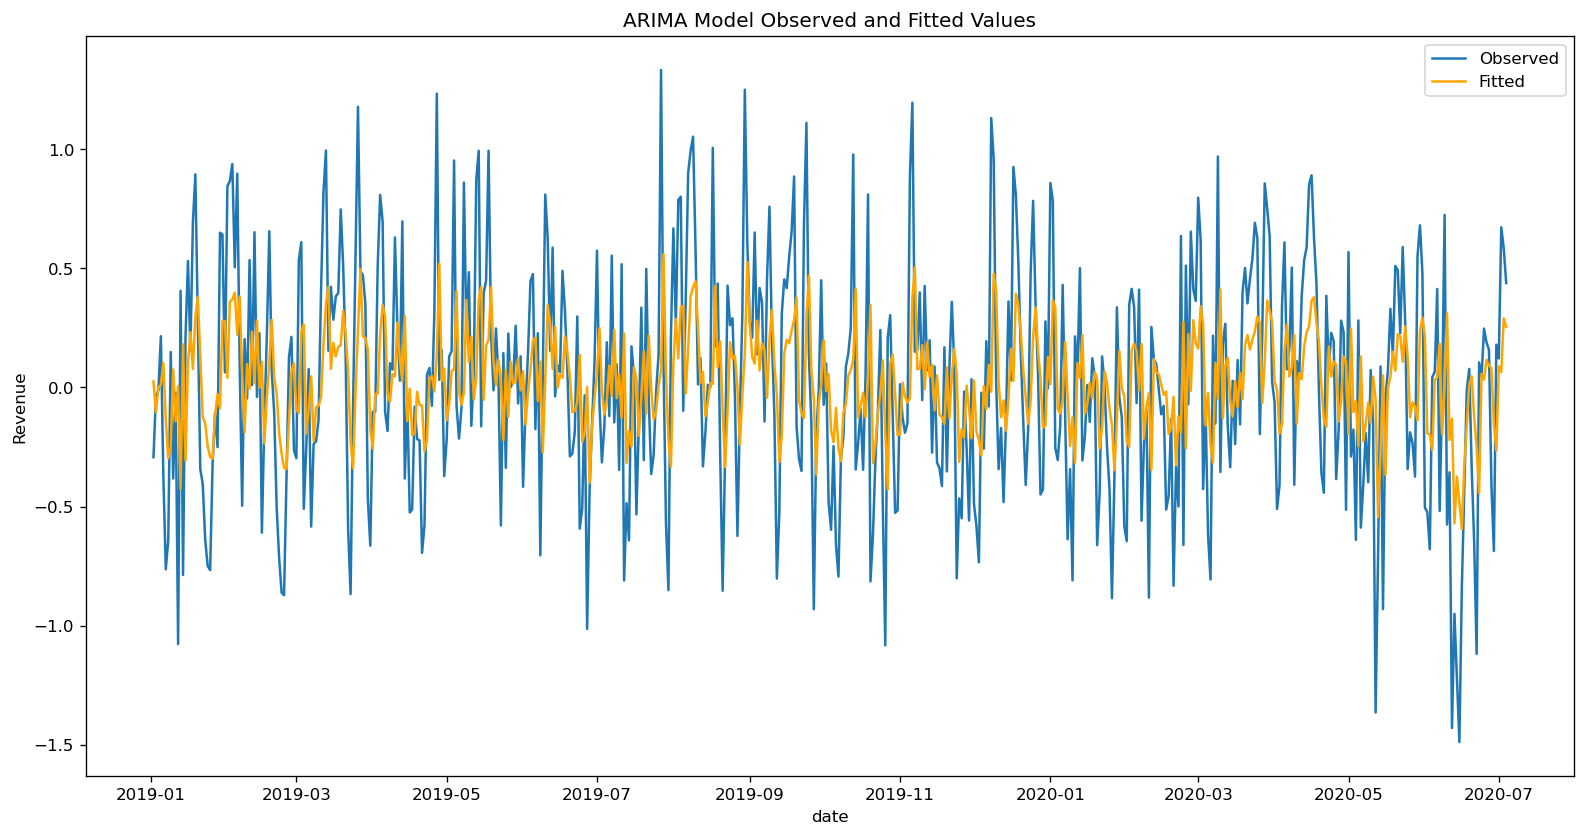

In [39]:
#plot observed and fitted values
plt.figure(figsize=(16, 8))
plt.plot(train, label='Observed')
plt.plot(model.fittedvalues, color='orange', label='Fitted')
plt.title('ARIMA Model Observed and Fitted Values')
plt.xlabel('date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

## D3. Forecasting Using ARIMA Model 

Now that I had the best model per the p, d, and q value - (1, 0, 0)(0, 0, 0)[0], I am now able to forecast the next 180 days of revenue.  This is the period of: 1/1/2021 - 6/29/2021.

 
First, I visualized the forecasted mean (Western Governors University, n.d.):


In [40]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
pred.index=df_stationary.index[start:end+1]
print(pred)

date
2020-07-05    0.194395
2020-07-06    0.094501
2020-07-07    0.053636
2020-07-08    0.036919
2020-07-09    0.030081
                ...   
2020-12-27    0.025347
2020-12-28    0.025347
2020-12-29    0.025347
2020-12-30    0.025347
2020-12-31    0.025347
Name: predicted_mean, Length: 180, dtype: float64


<Axes: xlabel='date'>

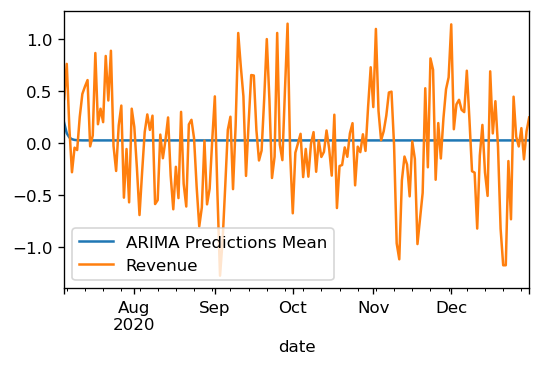

In [41]:
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions Mean')
pred.plot(legend=True)
test['Revenue'].plot(legend=True)

In [42]:
test['Revenue'].mean()

0.01218316916666667

Then I ran the prediction on the model for the next 180 days and received the following output that provides the forecast to 6/29/2021 (Western Governors University, n.d.):

In [43]:
#running model prediction
index_future_dates=pd.date_range(start='2020-12-31', end='2021-6-29')
print(index_future_dates)
pred=model.predict(start=len(df_stationary), end=len(df_stationary)+180, typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09',
               ...
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', length=181, freq='D')
2020-12-31    0.025347
2021-01-01    0.025347
2021-01-02    0.025347
2021-01-03    0.025347
2021-01-04    0.025347
                ...   
2021-06-25    0.025347
2021-06-26    0.025347
2021-06-27    0.025347
2021-06-28    0.025347
2021-06-29    0.025347
Freq: D, Name: ARIMA predictions, Length: 181, dtype: float64


## D4.  Output and Calculations

Once I had my forecasted data, I analyzed the model (Brownlee, 2020):

In [44]:
result=model.get_forecast()

In [45]:
print('Expected: %.3f' % result.predicted_mean)

Expected: 0.194


In [46]:
print('Standard Error: %.3f' % result.se_mean)

Standard Error: 0.444


In [47]:
# Calculate mean absolute error, mean squared error and root mean squared error
mae=abs(pred-test['Revenue']).mean()
mse=((pred-test['Revenue'])**2).mean()
rmse=mse**0.5
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.22121533225627227
Mean Squared Error (MSE): 0.048936223225252935
Root Mean Squared Error (RMSE): 0.22121533225627227


In [48]:
#calculate confidence interval
ci=result.conf_int(0.05)
ci=ci[-len(pred):]
print('95%% Interval: %.3f to %.3f' % (ci.iloc[0,0], ci.iloc[0,1]))

95% Interval: -0.676 to 1.065


#### Review of results

First, I obtained teh predicted mean and standard error of my model and forecasting data.  The forecasted data has an expected mean of 0.194.  In comparison, in D3, we obtained th emean of the testing data to be 0.012.  The standard error of 0.444 indicates that the actual mean may vary +/- 0.444 from the predicted mean.  In fact, the expected mean and test mean are within that range, with a difference of 0.182.

Next, I calculated the mean absolute error, the mean squared error, and teh root mean squared error of the predictions versus the test data.  The mean absolute error is 0.22 indicating that on average, the predictions are off by approximately 0.22 from the actual value.  The mean squared error is 0.048.  This indicates, on average, the squared differences between the predicted and actual values is approximately 0.048.  The root mean squared error is 0.22 indicating that on average, the predicted values are approximately 0.22 from the actual values. Lower values for all 3 of these metrics indicate higher accuracy of the model's predictions.

Finally, I calculated the confidence interval at 95% with a result of -0.676 to 1.065.  This confidence interval means that we can be 95% confident that actual and predicted variabels are within a range of -0.676 to 1.065 of each other, where the difference in the range is 0.389.  This confidence interval is also visualized below. 


## D5.  Code

The full code used is provided above.

# Part V: Data Summary and Implications

## E1. Results

After running auto ARIMA and testing other p, d, and q values for my ARIMA model, I determined that the best ARIMA model was as determined by auto ARIMA:  (1, 0, 0)(0, 0, 0)[0].  This model had the lowest AIC score found in all possible models.  


The data provided was daily revenue data over the span of approximately two years.  I didn’t change this daily interval and used my ARIMA model to forecast the next consecutive 180 days of revenue data. It is important to make sure that the amount of time we are forecasting for is the same amount of time as in our test data set (Resende, 2024). As such,  I chose to predict the next 180 dayssince  2 years of data is actually very little data to makelonger  predictions with when it comes to revenu. Itt seemed reasonable that 2 years of data would be sufficient to forecast up to 6 months ahead  As the data was measured in days and there are approximately 30 days in each month, I kept my forecasted time period as a factor of 30 so as to preserve any potential monthly trends.  Additionally, 180 days/6 months is also approximately 25% of the data, so within the acceptable 80/20 and 70/30 data split requirement. 

.
After calculating the mean absolute error, mean squared error, and root mean squared error, my model appears to have a high degree of accura, as discussed in more detail abovecy.


## E2.  Annotated Visualization

My annotated visualization of the forecast of my final model compared to the test set is below (Brownlee, 2020).  The orange represents the values from the training data, the blue is the values from the testing data, the red line is my forecasted data, and the light pink fill represents the range of values of the 95% confidence interval.

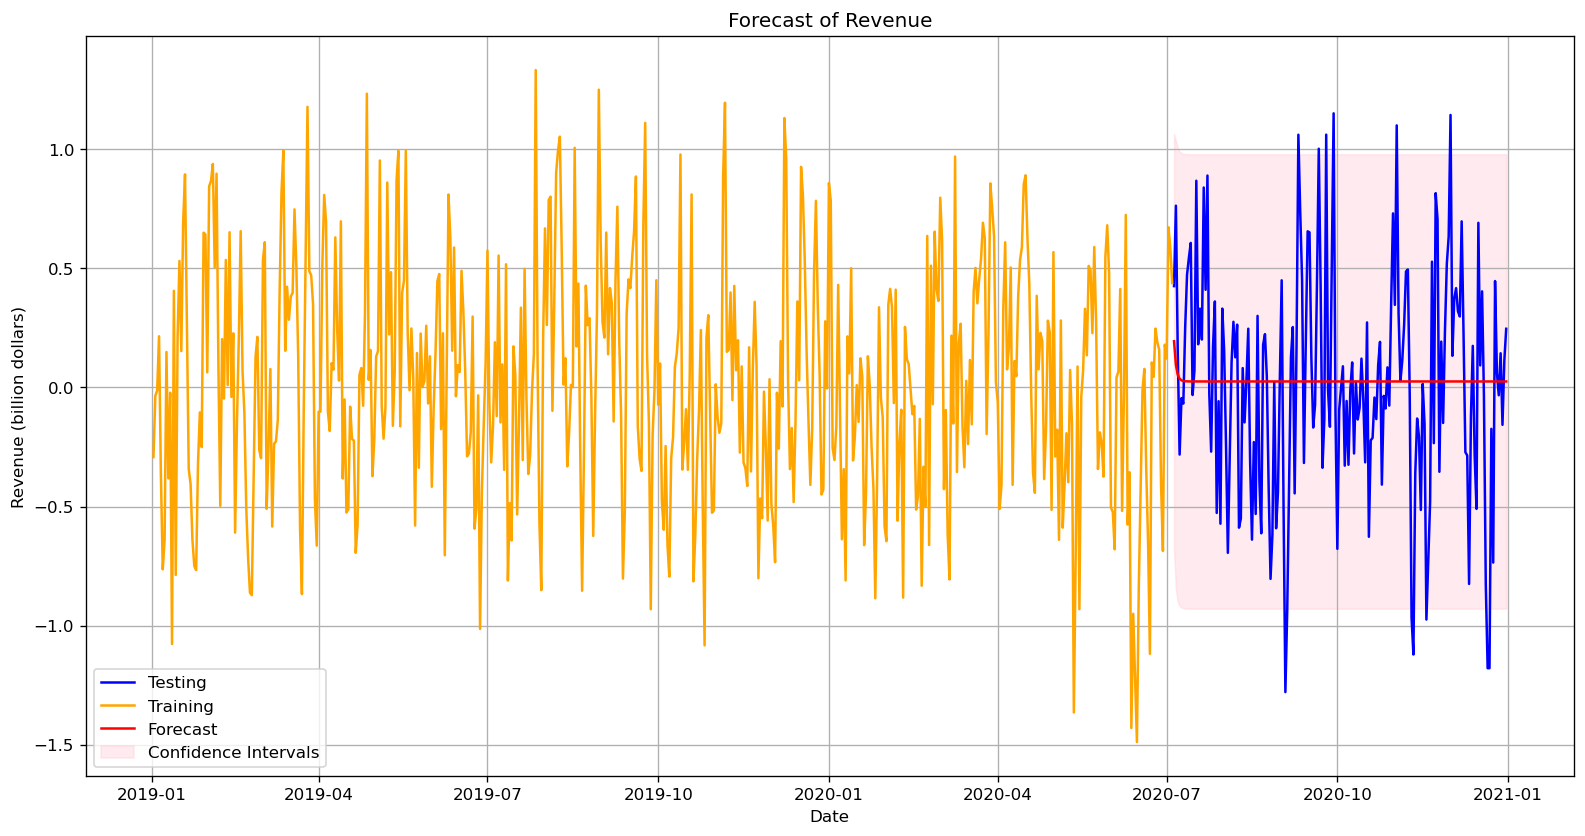

In [49]:
#Plot Forecast
pred=model.get_forecast(steps=len(test))

# Extract forecasted values and confidence intervals
pred_values = pred.predicted_mean
confidence_intervals = pred.conf_int()
pred_values.index = test.index
confidence_intervals.index = test.index

# Plotting the data
plt.figure(figsize=(16, 8))
plt.plot(test.index, test['Revenue'], label='Testing', color='blue')
plt.plot(train.index, train['Revenue'], label='Training', color='orange')
plt.plot(pred_values.index, pred_values, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

# Plot
plt.title('Forecast of Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (billion dollars)')
plt.legend()
plt.grid(True)
plt.show()

## E3.  Recommendation

While my model has a high degree of accuracy as visualized above and determined in the metrics also calculated above, I would recommend obtaining additional data over a longer period of time to re-evaluate the model with.  While I arbitrarily chose the dates to use, the fact that I chose dates that included the year 2020 is a good example of why data over a longer period of time is needed to make the most accurate forecasting model.  Due to the pandemic, many businesses were severely impacted, including revenue-wise, in ways that are not normal or necessarily indicative of performance.  While these events do happen, the pandemic was quite the anomaly in this case and thus revenue data from this time period would not be the most representative of the organization and thus would skew our model and forecasted results.

# Part VI: Reporting

## F.  Reporting

This section requires me to create a report using an industry-relevant interactive development enviroment but provides little guidance after that. As I have completed this task using Jupyter Notebook with appropriate formatting added, this document will act as my report.  

## G.  Sources for Third-Party Code


Western Governors University. (n.d.).  D213 Webinar Task One Arima I.  WGU.  [Video].  https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=358071e7-9c01-4274-a044-af7400ec1c40


Western Governors University.  (n.d.).  D213 Webinar Task 1 Data Preprocessing Python.  WGU.  [Video].  https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8d32afc8-d66f-42d5-9117-b100016cf9ac


Brownlee, Jason.  (2020).  Understand Time Series Forecast Uncertainty Using Prediction Intervals with Python.  Machine Learning Mastery.  https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/


## H.  Sources

Hyndman, Rob, & Athanasopoulos, George.  (2018).  *Forecasting: Principles and Practice* (3rd ed.).  https://otexts.com/fpp3/

Penn State University.  (n.d.).  *Applied Time Series Analysis*.  PSU.  https://online.stat.psu.edu/stat510/lesson/12/12.1

Brownlee, Jason. (2020).  *Understand Time Series Forecast Uncertainty Using Prediction Intervals with Python*.  Machine Learning Mastery.  https://machinelearningmastery.com/time-series-forecast-uncertainty-using-confidence-intervals-python/

Resende, Diogo.  (2024).  *ARIMA, SARIMA, and SARIMAX Explained*.  Zero to Mastery.  https://zerotomastery.io/blog/arima-sarima-sarimax-explained/on/


## I.  Professional Communication

Demonstrate professional communication in the content and presentation of your submission.
